# To predict whether any person is suffering from heart disease

# About Dataset

Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg : resting electrocardiographic results

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression
                                       of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalachh : maximum heart rate achieved

trestbps : resting blood pressure (in mm Hg on admission to the hospital)
    
output : 0= less chance of heart attack 1= more chance of heart attack

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [2]:
data=pd.read_csv('dataset.csv')

In [3]:
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.shape

(303, 14)

In [5]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [9]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Data visualization

In [10]:
import seaborn as sns

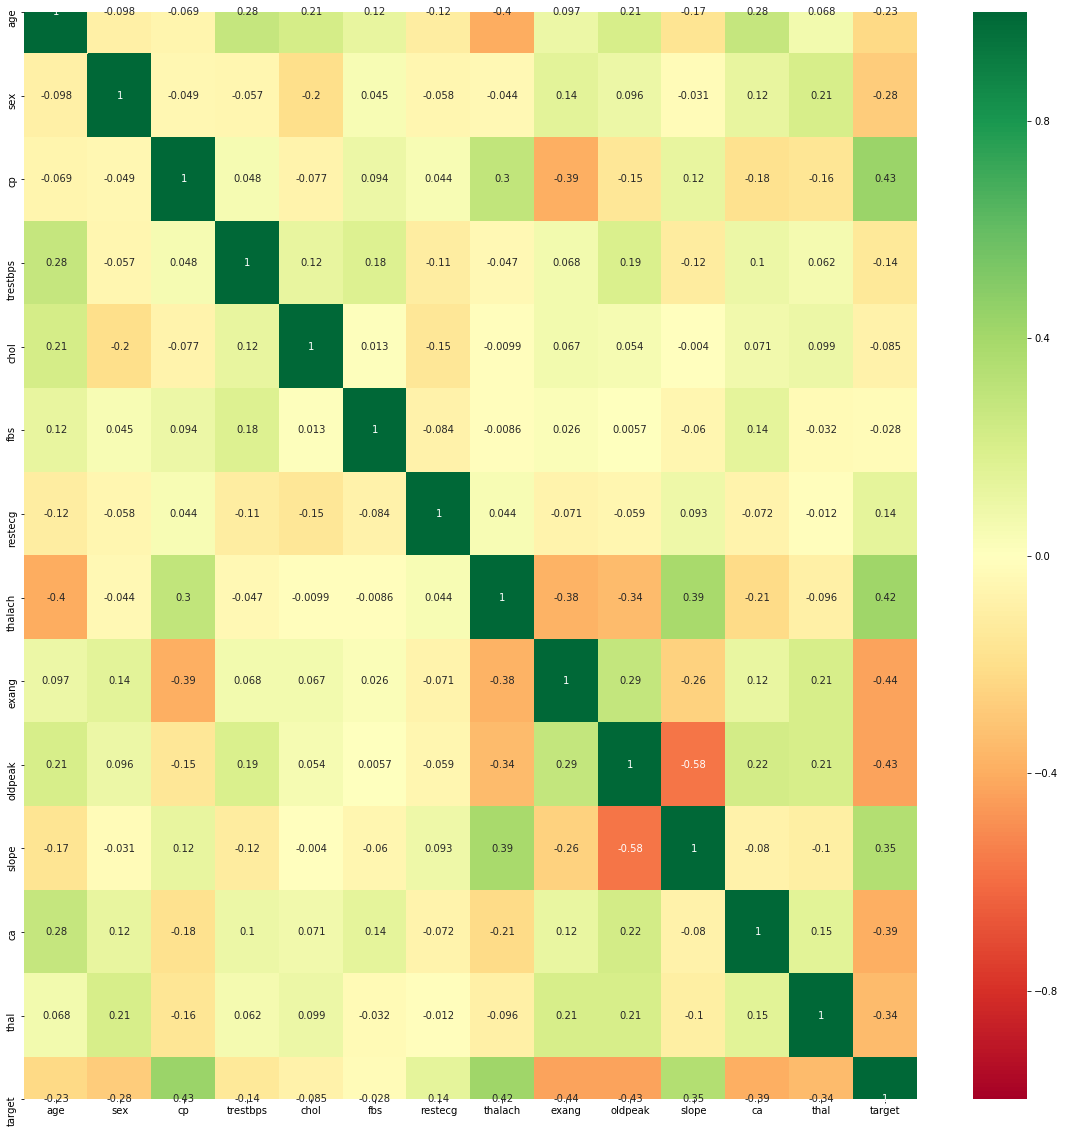

In [11]:
corr_df=data.corr(method='pearson')

plt.figure(figsize=(20,20))
sns.heatmap(corr_df,vmax=1.0,vmin=-1,annot=True,cmap='RdYlGn')

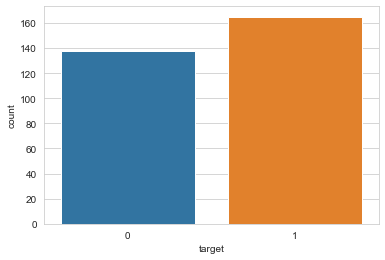

In [12]:
import seaborn as sns
sns.set_style('whitegrid')
sns.countplot(data['target'],data=data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E978FC8>,
      dtype=object)

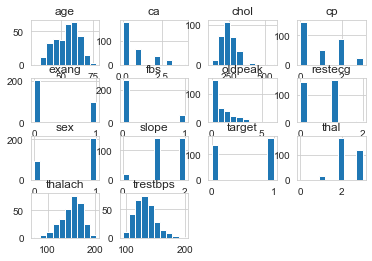

In [42]:
data.hist()

After exploring the dataset, I observed that I need to convert some categorical variables into dummy variables and 
scale all the values before training the Machine Learning models. 
First, I'll use the get_dummies method to create dummy columns for categorical variables.

In [14]:
dataset = pd.get_dummies(data, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [15]:
dataset

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
299,45,110,264,132,1.2,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
300,68,144,193,141,3.4,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
301,57,130,131,115,1.2,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1


In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [17]:
scaler=StandardScaler()

columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = scaler.fit_transform(dataset[columns_to_scale])

In [18]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [19]:
y=dataset['target']
x=dataset.drop(['target'],axis=1)

In [20]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

# Model Building

# KNN

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [22]:
Range = list(range(1,21))
knn_scores = []

In [23]:
for i in range(1,21):
    KNN = KNeighborsClassifier(n_neighbors=i)
    Accuracy = cross_val_score(KNN, x, y, cv=10, scoring='accuracy')
    knn_scores.append(round(Accuracy.mean(),3))
    

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

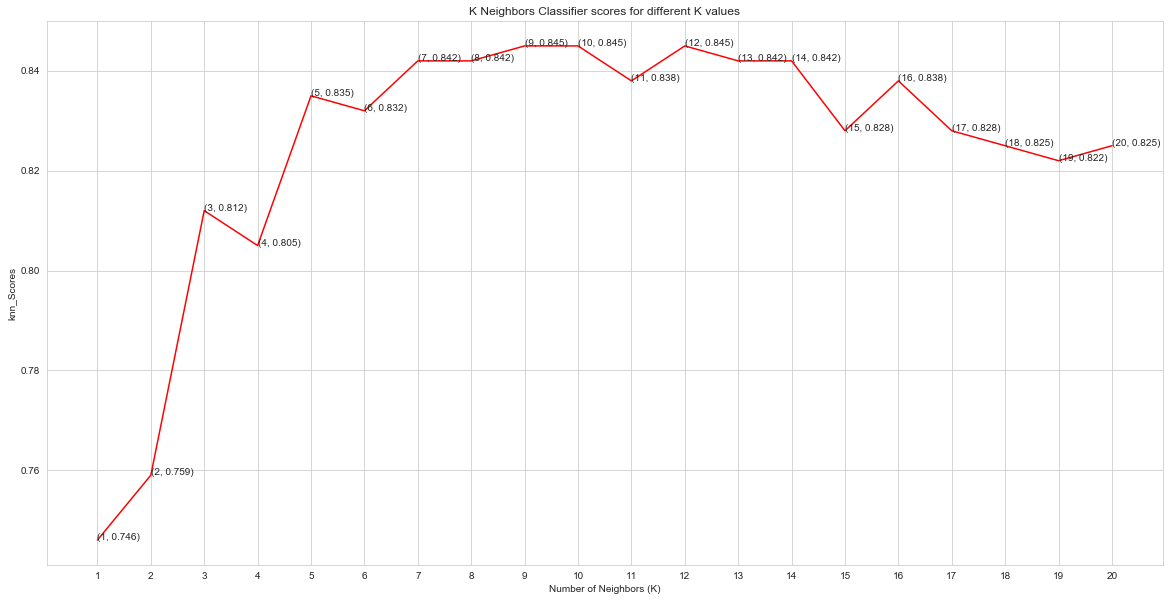

In [24]:
plt.figure(figsize=(20,10))
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.plot(Range, knn_scores,color='red')
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('knn_Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [25]:
knn_scores

[0.746,
 0.759,
 0.812,
 0.805,
 0.835,
 0.832,
 0.842,
 0.842,
 0.845,
 0.845,
 0.838,
 0.845,
 0.842,
 0.842,
 0.828,
 0.838,
 0.828,
 0.825,
 0.822,
 0.825]

In [26]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score=cross_val_score(knn_classifier,x,y,cv=10)
score.mean()

0.8448387096774195

# RandomForest

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
Range = list(range(10,100,10))
randomforest_scores=[]

In [60]:
for i in range(10,100,10):
    randomforest_classifier = RandomForestClassifier(n_estimators=i)
    Accuracy = cross_val_score(randomforest_classifier, x, y, cv=10, scoring='accuracy').mean()*100
    randomforest_scores.append(round(Accuracy.mean(),3))

Text(0.5, 1.0, 'Random Forest Classifier scores for different n values')

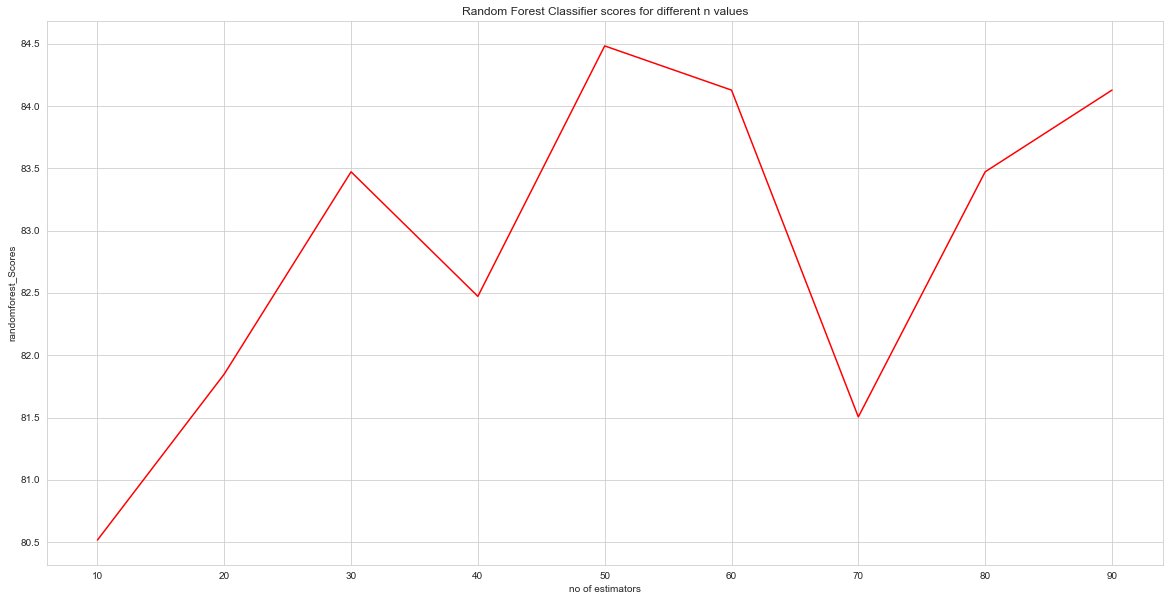

In [61]:
plt.figure(figsize=(20,10))
plt.plot(Range,randomforest_scores,color='red')
plt.xticks([i for i in range(10,100,10)])
plt.xlabel('no of estimators')
plt.ylabel('randomforest_Scores')
plt.title('Random Forest Classifier scores for different n values')

In [70]:
randomforest_classifier= RandomForestClassifier(n_estimators=50)

score=cross_val_score(randomforest_classifier,x,y,cv=10)

In [71]:
score.mean()

0.831505376344086

# DecisionTree

In [37]:
scores=[]
from sklearn.tree import DecisionTreeClassifier
for i in range(1,12):
    decision_classifier = DecisionTreeClassifier(criterion='gini',max_depth=i)
    cv_scores = cross_val_score(decision_classifier, x, y, cv=10).mean()
    scores.append(cv_scores)

In [38]:
scores

[0.735268817204301,
 0.7356989247311828,
 0.7850537634408602,
 0.738494623655914,
 0.738494623655914,
 0.7416129032258065,
 0.7287096774193548,
 0.7187096774193549,
 0.725268817204301,
 0.7317204301075269,
 0.7190322580645162]

In [51]:
decision_classifier = DecisionTreeClassifier(criterion='gini',max_depth=3)
cv_scores = cross_val_score(decision_classifier, x, y, cv=10).mean()
    

In [52]:
cv_scores

0.7850537634408602

# LogisticRegression

In [39]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
score=cross_val_score(classifier,x,y,cv=10)

In [40]:
score.mean()

0.8511827956989247